### import the libraries

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

### studying the data :

In [110]:
# import the data from happydata.csv
data = pd.read_csv("happydata.csv")
data.head()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0


In [111]:
data.shape

(143, 7)

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   infoavail      143 non-null    int64
 1   housecost      143 non-null    int64
 2   schoolquality  143 non-null    int64
 3   policetrust    143 non-null    int64
 4   streetquality  143 non-null    int64
 5   ëvents         143 non-null    int64
 6   happy          143 non-null    int64
dtypes: int64(7)
memory usage: 7.9 KB


In [113]:
# drop all the rows with no values
data.dropna(axis= 0, inplace= True)

In [114]:
data.describe()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,4.314685,2.538462,3.265734,3.699301,3.615385,4.216783,0.538462
std,0.799820,1.118155,0.992586,0.888383,1.131639,0.848693,0.500271
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,1.000000
75%,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


show some statistics on the data :

In [115]:
data.columns

Index(['infoavail', 'housecost', 'schoolquality', 'policetrust',
       'streetquality', 'ëvents', 'happy'],
      dtype='object')

In [116]:
data.isnull().sum()

infoavail        0
housecost        0
schoolquality    0
policetrust      0
streetquality    0
ëvents           0
happy            0
dtype: int64

In [117]:
data.duplicated().sum()

18

In [118]:
data.drop_duplicates()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
5,5,5,3,5,5,5,1
...,...,...,...,...,...,...,...
137,5,2,3,4,4,3,1
138,5,3,3,1,3,5,0
139,5,2,3,4,2,5,1
141,4,3,3,4,4,5,0


In [119]:
# number of happy and unhappy people
data["happy"].value_counts()

happy
1    77
0    66
Name: count, dtype: int64

In [120]:
# the difference beteween happy and unhappy people in terms of data critics
data.groupby(["happy"]).mean()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents
happy,,,,,,
0,4.045455,2.515152,3.090909,3.590909,3.363636,4.015152
1,4.545455,2.558442,3.415584,3.792208,3.831169,4.389610


<Axes: xlabel='happy'>

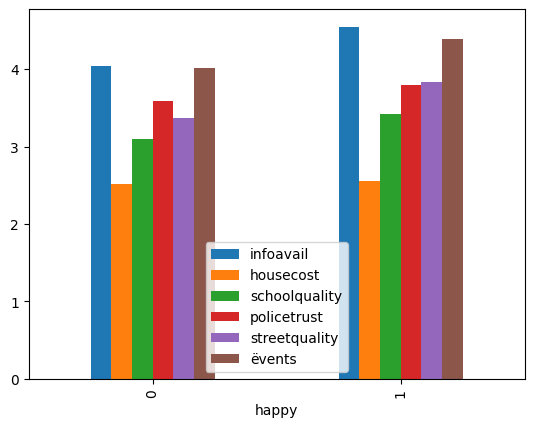

In [121]:
data.groupby(["happy"]).mean().plot.bar()

there is a bit of difference in terms of school quality, police trust and others that makes the individual happy or not

In [122]:
def plotter(data, col_name: str, target_name: str, ax) :
    sns.countplot(data= data, x= col_name, hue= target_name, ax= ax)
    ax.set_title(f"{col_name.upper()} DESTRIBITION")
    for container in ax.containers :
        ax.bar_label(container)

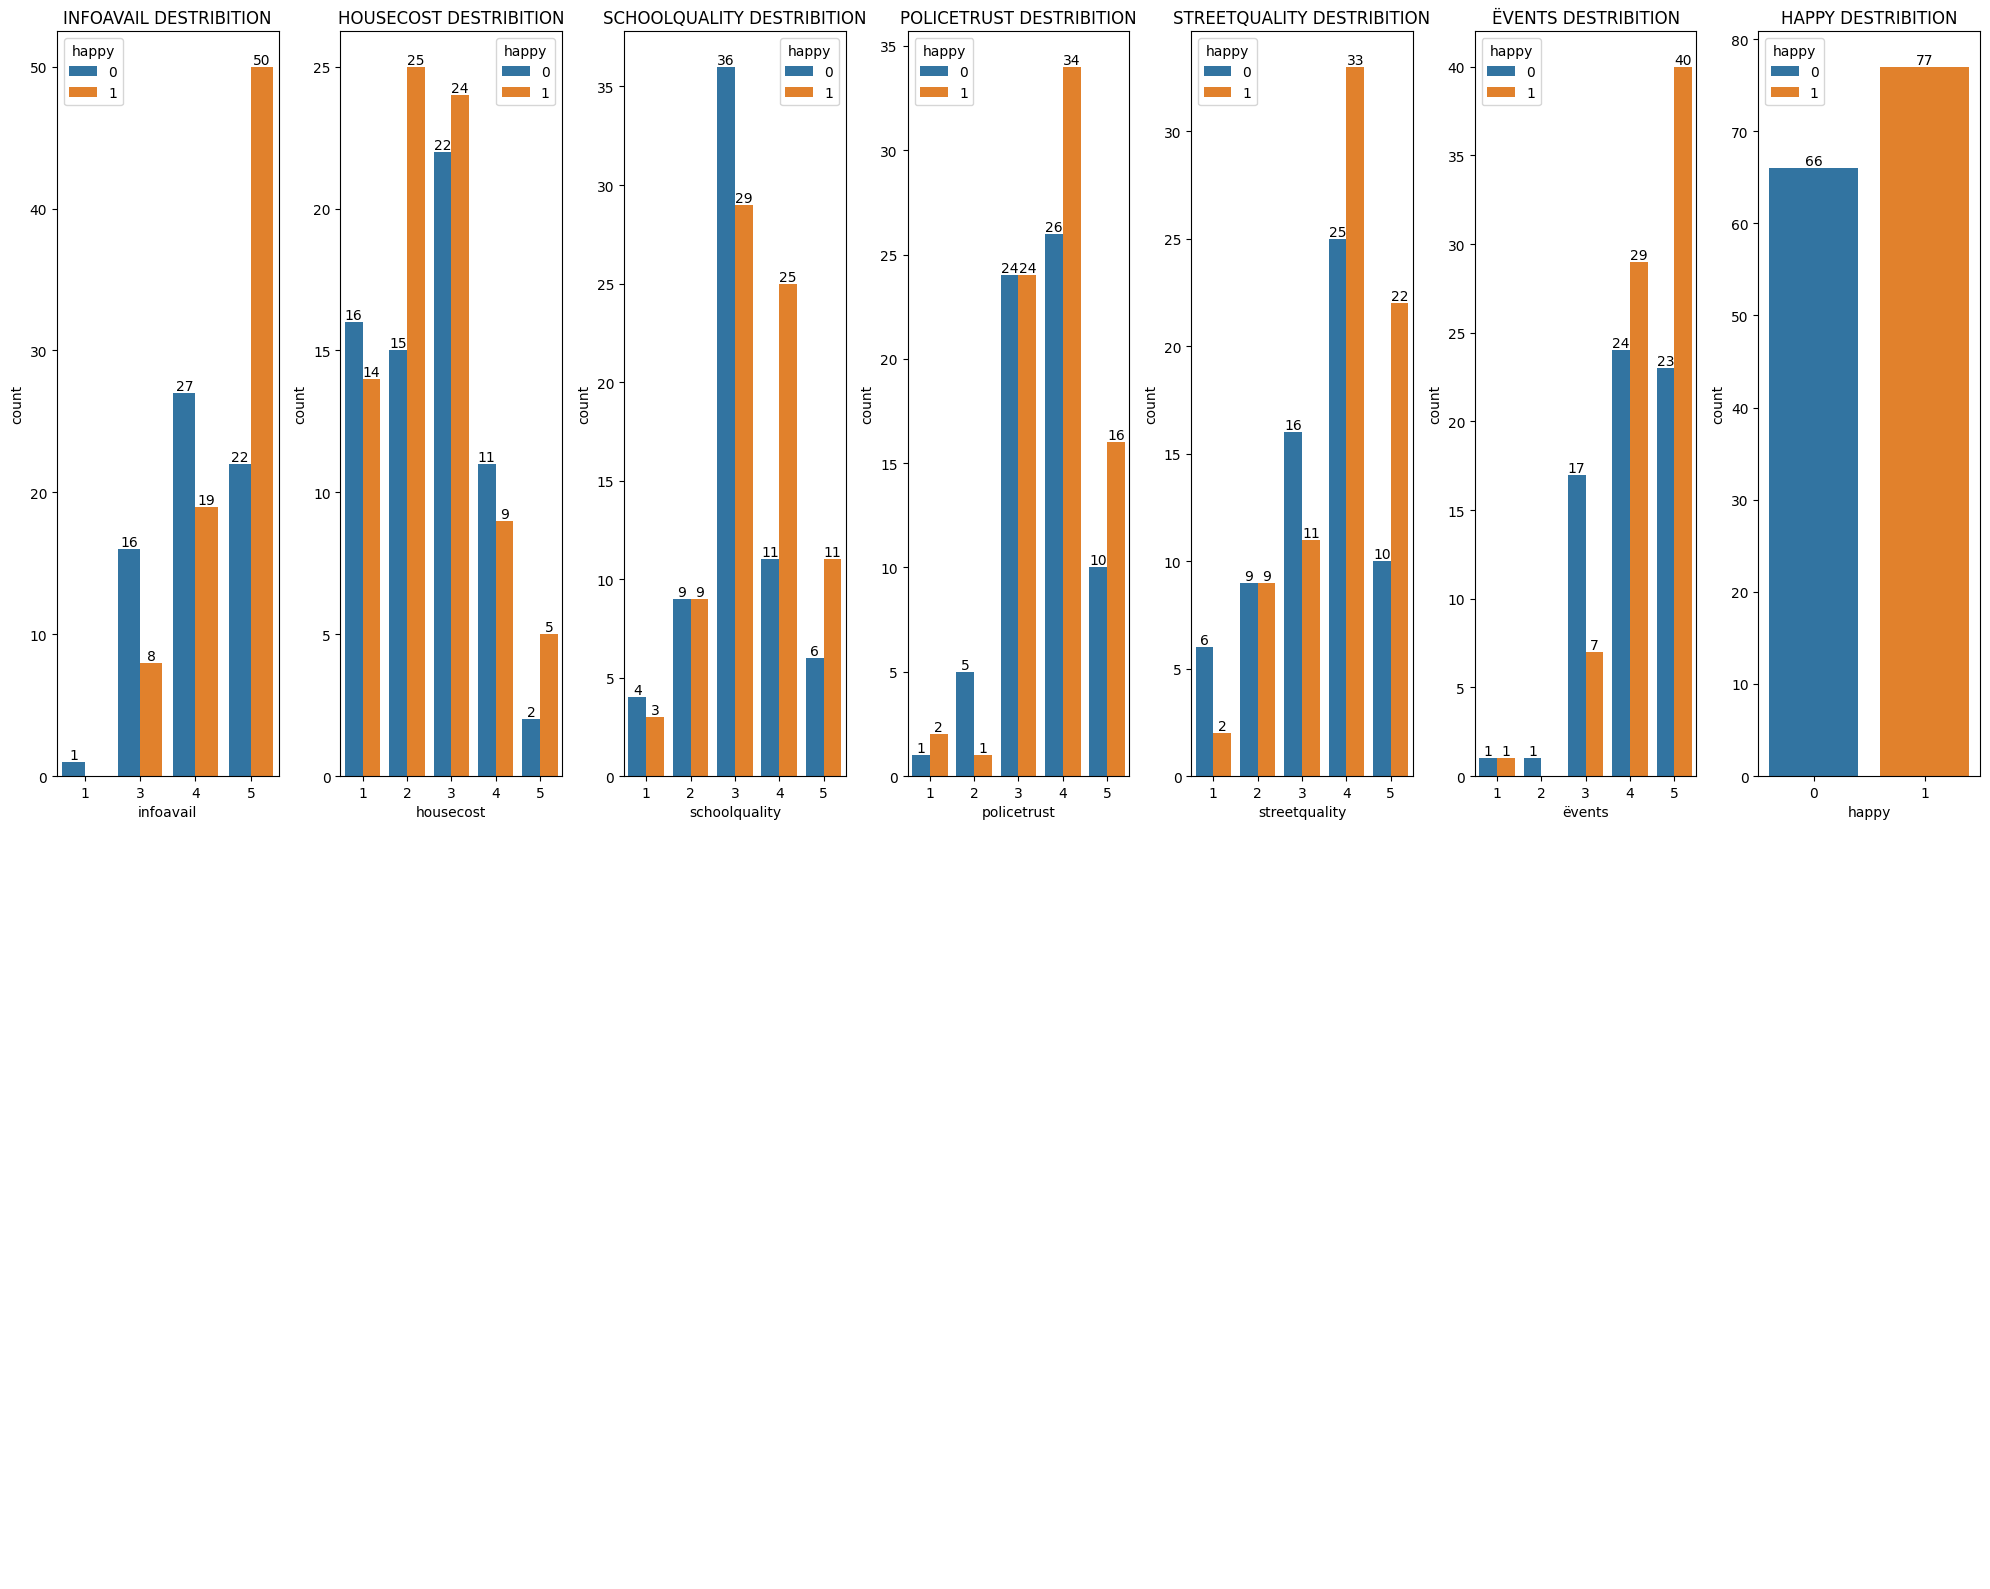

In [123]:
cols= data.columns
count_cols = len(cols)
fig, axes = plt.subplots(nrows=2, ncols=count_cols, figsize=(20, 16))

for i, col in enumerate(cols) :
    row_index = i // count_cols
    col_index = i % count_cols
    ax = axes[row_index, col_index]
    plotter(data, col, 'happy', ax)

# Removing the Unnecessary subplots
for i in range(count_cols * 2 - len(cols)):
    row_index = (i + len(cols)) // count_cols
    col_index = (i + len(cols)) % count_cols
    ax = axes[row_index, col_index]
    ax.axis('off')

plt.tight_layout()
plt.show()

In [124]:
x= data[data["happy"]==1]
x.head()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
2,5,3,3,3,3,5,1
5,5,5,3,5,5,5,1
7,5,4,4,4,4,5,1
12,5,2,4,5,5,5,1
15,3,2,4,3,4,4,1


In [125]:
y= data[data["happy"]==0]
y.head()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0
6,3,1,2,2,1,3,0


In [126]:
print(x.shape, y.shape)

(77, 7) (66, 7)


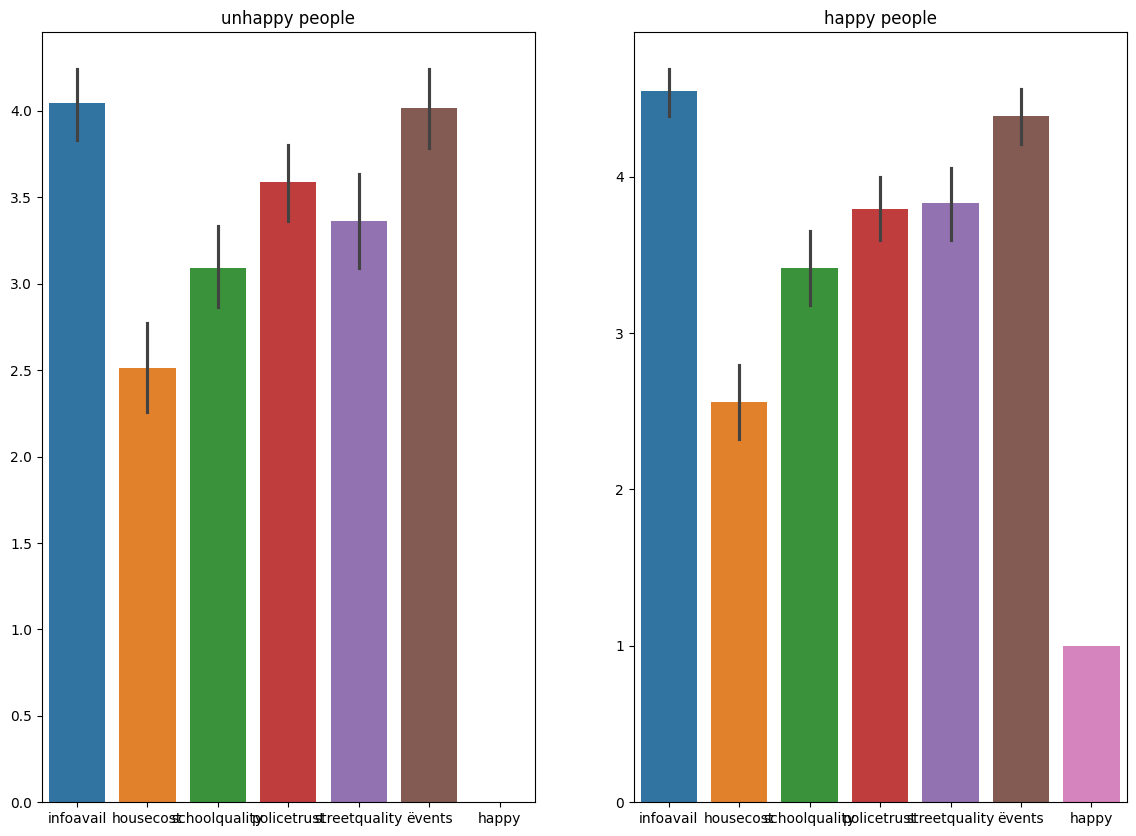

In [127]:
plt.figure(figsize= (14,10))
plt.subplot(1,2,1)
sns.barplot(data= y)
plt.title("unhappy people")
plt.subplot(1,2,2)
sns.barplot(data= x)
plt.title("happy people")
plt.show()

<Axes: >

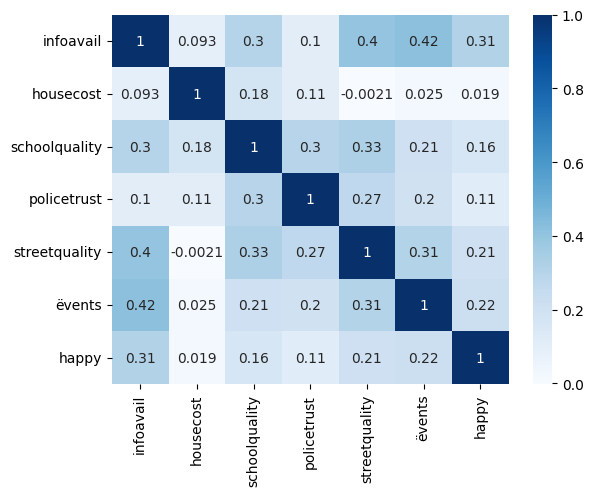

In [128]:
sns.heatmap(data.corr(), annot= True, cmap= "Blues")

### split the data :

In [144]:
x= data[["infoavail", "housecost", "schoolquality", "policetrust", "streetquality", "ëvents"]]
y= data["happy"]

In [130]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1)

In [131]:
print(x_train.shape, x_test.shape)

(128, 6) (15, 6)


In [132]:
print(y_train.shape, y_test.shape)

(128,) (15,)


### KNN classifier :

In [133]:
model = KNeighborsClassifier()

In [134]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [135]:
knn = model.fit(x_train, y_train)
print(f"train score : {knn.score(x_train, y_train)}")
print(f"test score : {knn.score(x_test, y_test)}")

train score : 0.7109375
test score : 0.3333333333333333


### KNN Classifier with GridSearchCV :

In [136]:
param_grid = {"n_neighbors": np.arange(1, 30),
              "metric": ["euclidean", "manhattan"]}

In [137]:
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = param_grid, cv= 10)

In [138]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [139]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 4}


In [140]:
best_knn = grid_search.best_estimator_
best_knn

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [141]:
print(f"the best score : {grid_search.best_score_}")

the best score : 0.617948717948718


In [142]:
best_knn.score(x_test, y_test)

0.6

In [143]:
# exemple : 
exemple = np.array([1,2,3,4,1,3]).reshape(1, 6)
print(f"prediction if you are happy or not : {best_knn.predict(exemple)}")
print(best_knn.predict_proba(exemple))

prediction if you are happy or not : [0]
[[0.75 0.25]]


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
